In [1]:
from utils.data_handling import *
from utils.sensor_optimisation_gpy_sparse import *
from parameters import *
import GPy

import matplotlib.pyplot as plt
np.random.seed(101)


In [2]:
parameters['i_end'] = 100
parameters


{'i_start': 0,
 'i_end': 100,
 'crop': ((-10, 10), (-10, 10), (0, 50)),
 'field_name': 'TracerBackground',
 'cov_method': 'sample'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0
==> Cropping vtu files to ((-10, 10), (-10, 10), (0, 50))
Number of Locations after cropping :  1129
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/loc_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/time_TracerBackground.pkl
==> Loading from : ../data/temp_data/cache_0_100_((-10, 10), (-10, 10), (0, 50))/data_TracerBackground.pkl


In [4]:
# Data for the regression
dim = 3
t = 100
X = loc_df.values #[I,:dim]
Y = data_df.values[:,t].reshape(-1,1) # [I,t].reshape(-1,1)
Y.shape

(1129, 1)

In [7]:
m_inducing = 100
kernel = GPy.kern.Matern52(dim,ARD=False) + GPy.kern.White(dim)
model_gp = GPy.models.SparseGPRegression(X,Y,kernel,num_inducing=m_inducing)

{'inducing': <matplotlib.collections.PathCollection at 0x7f335c2fb438>}

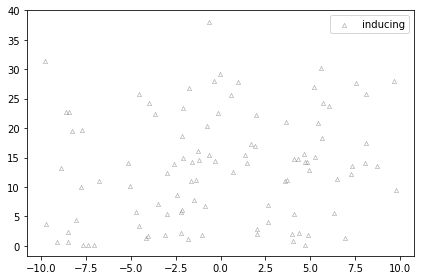

In [8]:
model_gp.plot_inducing(visible_dims=[0,2])

In [9]:
model_gp.optimize(messages=True,max_iters = 100000)


{'inducing': <matplotlib.collections.PathCollection at 0x7f33543ba3c8>}

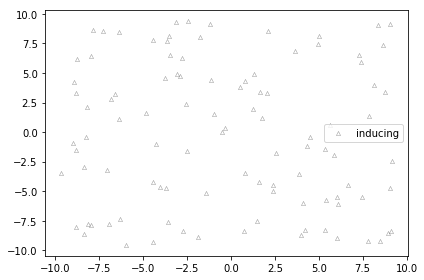

In [15]:
model_gp.plot_inducing(visible_dims=[0,1])

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f335c09f5f8>]}

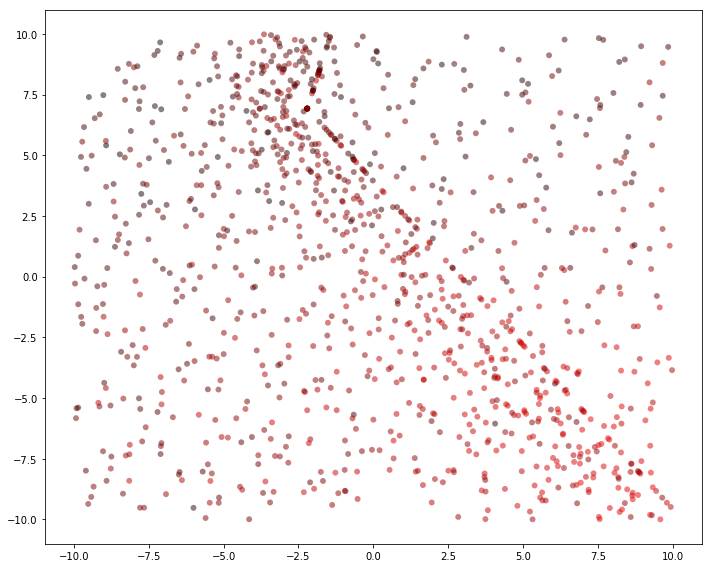

In [13]:
model_gp.plot_data(visible_dims=[0,1],figsize=(10,8))

{'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f335c08aac8>]}

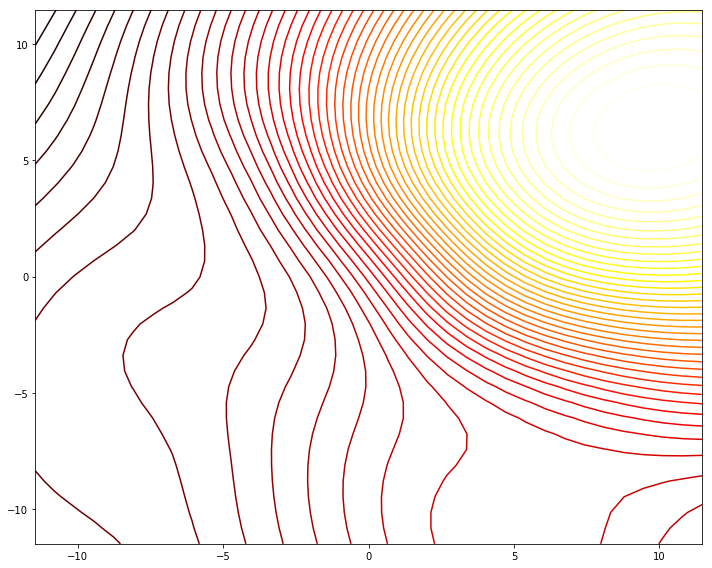

In [14]:
model_gp.plot_mean(visible_dims=[0,1],figsize=(10,8),levels=50)

## Sensor Optimisation

Define the Sets for the optimisation

In [16]:
n_V = X.shape[0]
sets = define_sets(n_V)

Number of sensors to place : 

In [17]:
k = 10

### Lazy Sensor Optimisation

In [23]:
A_opt = {}

In [26]:
A_opt['lazy'] = sensor_loc_optimisation_lazy(k, sets, X, Y, model_gp)

In [30]:
A_opt['lazy'] 

array([ 458,  508, 1105,  187, 1125,  220,  784,   67,  166,  132])

### Naive Sensor Optimisation

In [27]:
A_opt['naive'] = sensor_loc_optimisation_naive(k, sets, X, Y, model_gp)

In [29]:
A_opt['naive']

array([ 458,  508, 1105,  187, 1125,  220,  784,   67,  166,  132])

In [43]:
A = np.zeros((n_V,1))
A[A_opt['naive'],:] = 1

In [44]:
save_vtu(ref_vtu[0],"A_lazy_k10.vtu",A)

==> Saved to : ../data/temp_data/LSBU_res_2019:07:03-13:38:32_A_lazy_k10.vtu


{0: <vtktools.vtu at 0x7f335f7066d8>}